# 2D Generalized Relu Scoop Networks

In [272]:
from neuralnetwork import Network
from neuralnetwork.datasets import blobs, circle
from neuralnetwork.activations import absolute, relu, sigmoid

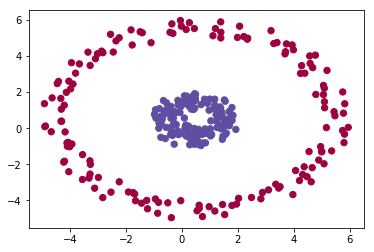

In [273]:
X_train, Y_train= circle.load_data()
circle.graph(X_train,Y_train)

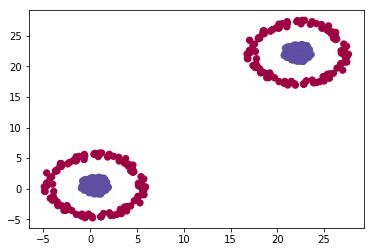

In [274]:
X_train, Y_train = circle.load_data_multiple_circles(number_of_blobs=2)
circle.graph(X_train,Y_train)

Layer: L0, Neurons: 2
Layer: L1, Neurons: 4, Weights: (4, 2), Biases: (4, 1)
Layer: L2, Neurons: 1, Weights: (1, 4), Biases: (1, 1)


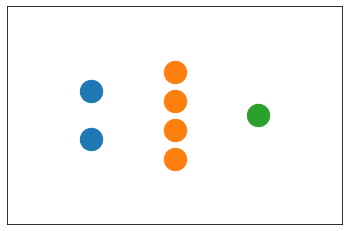

In [282]:
mynetwork = Network(2)
mynetwork.add_layer(number_of_neurons = 4 , activation=relu)
mynetwork.add_layer(number_of_neurons = 1, activation=sigmoid)
mynetwork.summary()

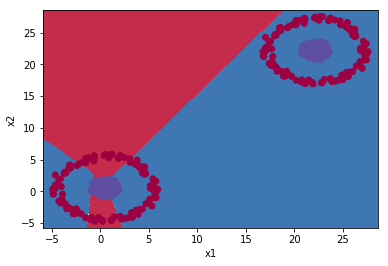

In [283]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [284]:
from neuralnetwork.optimizers import adam

Loss:1.285658 Acc:0.315000: 100%|██████████| 100/100 [00:00<00:00, 1023.99it/s]


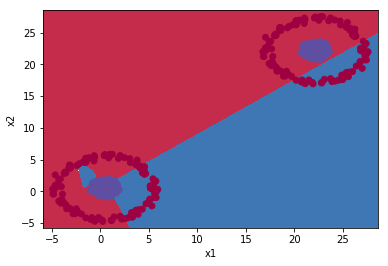

Loss:1.026583 Acc:0.395000: 100%|██████████| 100/100 [00:00<00:00, 1029.90it/s]


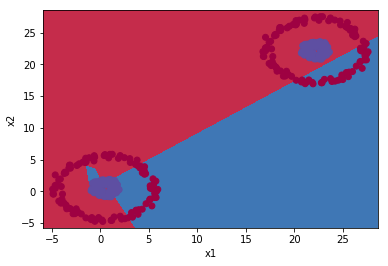

Loss:0.821947 Acc:0.412500: 100%|██████████| 100/100 [00:00<00:00, 1167.52it/s]


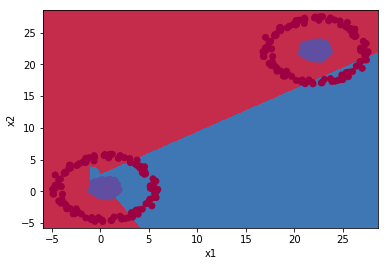

Loss:0.694216 Acc:0.460000: 100%|██████████| 100/100 [00:00<00:00, 1032.10it/s]


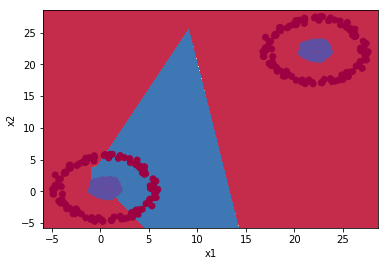

Loss:0.638477 Acc:0.550000: 100%|██████████| 100/100 [00:00<00:00, 1029.69it/s]


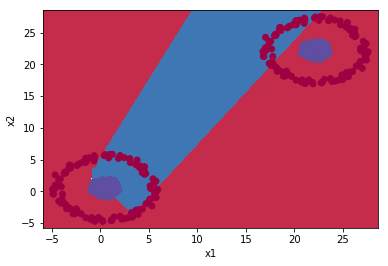

In [286]:
num_epochs = 100
batch_size = 64
learning_rate=0.001
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, optimizer = adam, beta = 0.9)
    blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

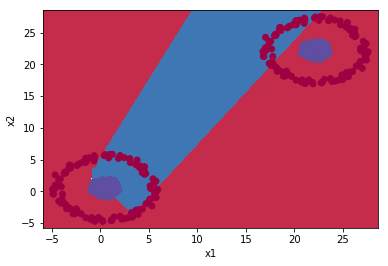

In [287]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

# Create Relu Scoop

In [288]:
import numpy as np

In [289]:
# Set 'center' to (0,0)
mynetwork.layers['L1']['biases'] = np.zeros_like(mynetwork.layers['L1']['biases'])
mynetwork.layers['L1']['biases']

array([[0.],
       [0.],
       [0.],
       [0.]])

In [290]:
# Set the slopes
mynetwork.layers['L1']['weights'] = np.array([[1.0,1.0],[-1.0,-1.0],[1.0,-1.0],[-1.0,1.0]])
mynetwork.layers['L1']['weights']

array([[ 1.,  1.],
       [-1., -1.],
       [ 1., -1.],
       [-1.,  1.]])

In [291]:
mynetwork.layers['L2']['weights'] = -np.ones_like(mynetwork.layers['L2']['weights'])
mynetwork.layers['L2']['weights']

array([[-1., -1., -1., -1.]])

In [292]:
mynetwork.layers['L2']['biases'] =  np.zeros_like(mynetwork.layers['L2']['biases'])+5.0
mynetwork.layers['L2']['biases'] 

array([[5.]])

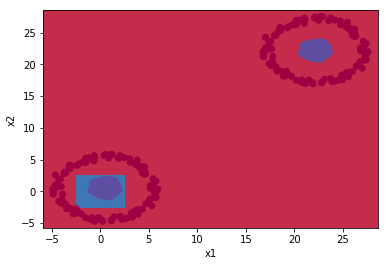

In [293]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [294]:
mynetwork.accuracy(X_train,Y_train)

0.75

In [295]:
num_epochs = 1000
batch_size = 64
learning_rate=0.001
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, optimizer = adam, beta = 0.9)

Loss:0.260576 Acc:0.907500: 100%|██████████| 1000/1000 [00:00<00:00, 1189.29it/s]


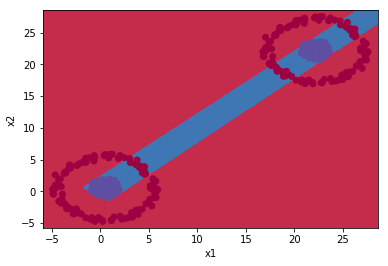

In [296]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

# Now for 2 scoops

Layer: L0, Neurons: 2
Layer: L1, Neurons: 8, Weights: (8, 2), Biases: (8, 1)
Layer: L2, Neurons: 2, Weights: (2, 8), Biases: (2, 1)
Layer: L3, Neurons: 1, Weights: (1, 2), Biases: (1, 1)


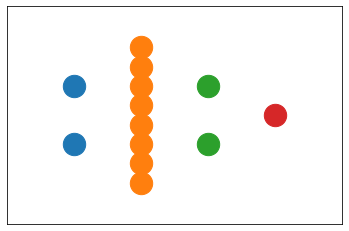

In [297]:
mynetwork = Network(2)
mynetwork.add_layer(number_of_neurons = 8 , activation=relu)
mynetwork.add_layer(number_of_neurons = 2 , activation=relu)
mynetwork.add_layer(number_of_neurons = 1, activation=sigmoid)
mynetwork.summary()

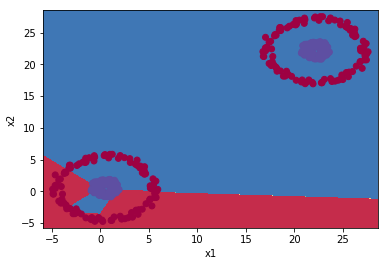

In [298]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [302]:
num_epochs = 1000
batch_size = 64
learning_rate=0.001
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, optimizer = adam, beta = 0.9)

Loss:0.155293 Acc:0.947500: 100%|██████████| 1000/1000 [00:01<00:00, 808.19it/s]


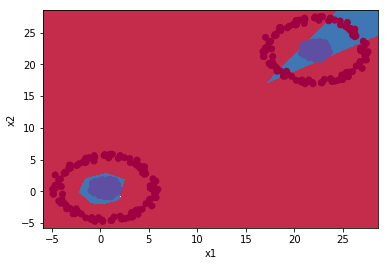

In [300]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

# Not bad

# Let's reinitialize the points Create Relu Scoop

In [303]:
import numpy as np

In [304]:
mynetwork.layers['L1']['biases'] = np.array([[0.0,0.0,0.0,0.0,-44.0,44.0,0.0,0.0]]).T

In [305]:
mynetwork.layers['L1']['weights'] = np.array([[1.0,1.0],[-1.0,-1.0],[1.0,-1.0],[-1.0,1.0],[1.0,1.0],[-1.0,-1.0],[1.0,-1.0],[-1.0,1.0]])

In [306]:
mynetwork.layers['L2']['weights'] = -np.array([[1.0,1.0,1.0,1.0,0,0,0,0],[0,0,0,0,1.0,1.0,1.0,1.0]])

In [307]:
mynetwork.layers['L2']['biases']

array([[-1.1384939 ],
       [ 0.31514371]])

In [308]:
mynetwork.layers['L2']['biases'] =  np.zeros_like(mynetwork.layers['L2']['biases']) + 4.0

In [309]:
mynetwork.layers['L3']['weights'] = np.ones_like(mynetwork.layers['L3']['weights'])

In [310]:
mynetwork.layers['L3']['biases'] = np.zeros_like(mynetwork.layers['L3']['biases'])-0.05

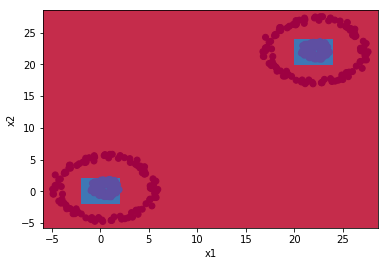

In [311]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [312]:
mynetwork.accuracy(X_train,Y_train)

1.0

In [317]:
num_epochs = 100
batch_size = 64
learning_rate=0.001
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, optimizer = adam, beta = 0.9)

Loss:nan Acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 838.10it/s]


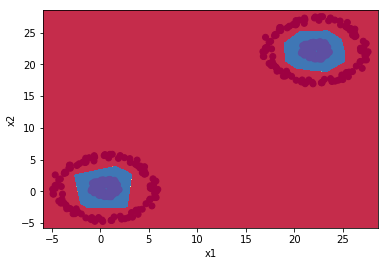

In [319]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

# Now for 4 scoops!

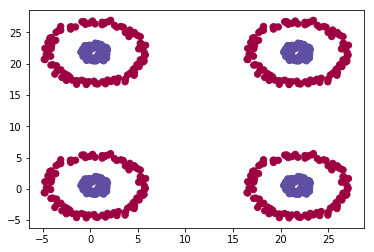

In [320]:
X_train, Y_train = circle.load_data_multiple_circles(number_of_blobs=4)
circle.graph(X_train,Y_train)

Layer: L0, Neurons: 2
Layer: L1, Neurons: 4, Weights: (4, 2), Biases: (4, 1)
Layer: L2, Neurons: 1, Weights: (1, 4), Biases: (1, 1)


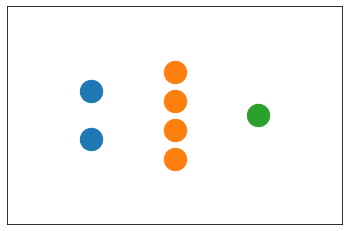

In [321]:
mynetwork = Network(2)
mynetwork.add_layer(number_of_neurons = 4 , activation=relu)
mynetwork.add_layer(number_of_neurons = 1, activation=sigmoid)
mynetwork.summary()

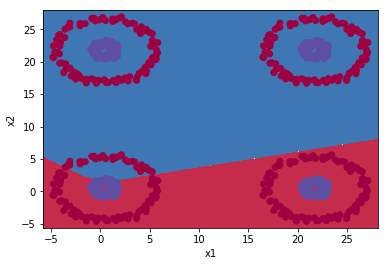

In [322]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [323]:
from neuralnetwork.optimizers import adam

In [324]:
num_epochs = 1000
batch_size = 64
learning_rate=0.001
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, optimizer = adam, beta = 0.9)

Loss:0.551935 Acc:0.680000: 100%|██████████| 1000/1000 [00:01<00:00, 657.81it/s]


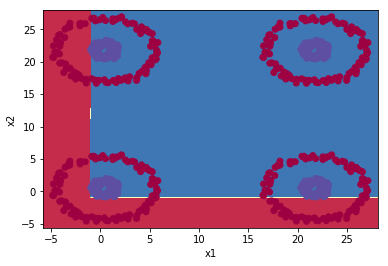

In [325]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

# Create Relu Scoop

In [326]:
import numpy as np

In [327]:
# Set 'center' to (0,0)
mynetwork.layers['L1']['biases'] = np.zeros_like(mynetwork.layers['L1']['biases'])
mynetwork.layers['L1']['biases']

array([[0.],
       [0.],
       [0.],
       [0.]])

In [328]:
# Set the slopes
mynetwork.layers['L1']['weights'] = np.array([[1.0,1.0],[-1.0,-1.0],[1.0,-1.0],[-1.0,1.0]])
mynetwork.layers['L1']['weights']

array([[ 1.,  1.],
       [-1., -1.],
       [ 1., -1.],
       [-1.,  1.]])

In [329]:
mynetwork.layers['L2']['weights'] = -np.ones_like(mynetwork.layers['L2']['weights'])
mynetwork.layers['L2']['weights']

array([[-1., -1., -1., -1.]])

In [330]:
mynetwork.layers['L2']['biases'] =  np.zeros_like(mynetwork.layers['L2']['biases'])+5.0
mynetwork.layers['L2']['biases'] 

array([[5.]])

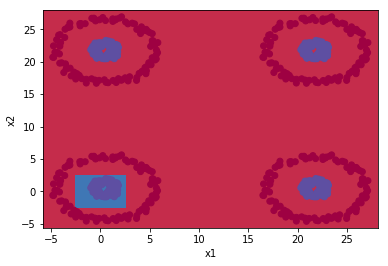

In [331]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [332]:
mynetwork.accuracy(X_train,Y_train)

0.625

In [333]:
num_epochs = 1000
batch_size = 64
learning_rate=0.001
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, optimizer = adam, beta = 0.9)

Loss:0.522249 Acc:0.678750: 100%|██████████| 1000/1000 [00:01<00:00, 633.02it/s]


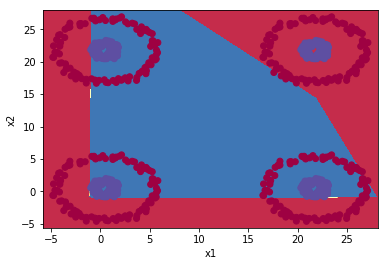

In [334]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

# Now for 4 scoops

Layer: L0, Neurons: 2
Layer: L1, Neurons: 16, Weights: (16, 2), Biases: (16, 1)
Layer: L2, Neurons: 4, Weights: (4, 16), Biases: (4, 1)
Layer: L3, Neurons: 1, Weights: (1, 4), Biases: (1, 1)


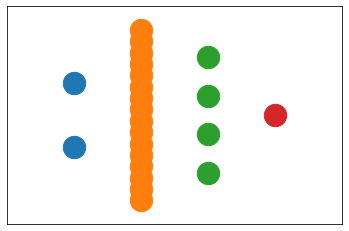

In [335]:
mynetwork = Network(2)
mynetwork.add_layer(number_of_neurons = 16 , activation=relu)
mynetwork.add_layer(number_of_neurons = 4 , activation=relu)
mynetwork.add_layer(number_of_neurons = 1, activation=sigmoid)
mynetwork.summary()

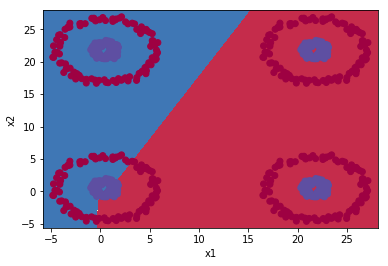

In [336]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [343]:
num_epochs = 1000
batch_size = 64
learning_rate=0.001
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, optimizer = adam, beta = 0.9)

Loss:nan Acc:0.980000: 100%|██████████| 1000/1000 [00:02<00:00, 435.10it/s]


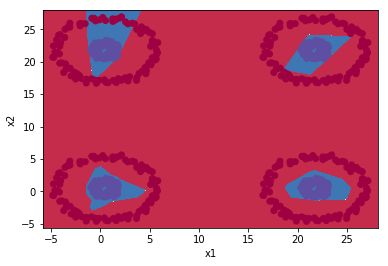

In [344]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

# Not bad

# Let's reinitialize the points Create Relu Scoop

In [345]:
import numpy as np

In [346]:
mynetwork.layers['L1']['biases'].shape == np.array([[0,0,0,0,-44.0,44.0,0,0,-22.0,22.0,-22.0,22.0,-22.0,22.0,22.0,-22.0]]).T.shape

True

In [347]:
mynetwork.layers['L1']['biases'] = np.array([[0,0,0,0,-44.0,44,0,0,-22,22,-22,22,-22,22,22,-22]]).T

In [348]:
mynetwork.layers['L1']['weights'] = np.array([[1.0,1.0],[-1.0,-1.0],[1.0,-1.0],[-1.0,1.0],[1.0,1.0],[-1.0,-1.0],[1.0,-1.0],[-1.0,1.0],[1.0,1.0],[-1.0,-1.0],[1.0,-1.0],[-1.0,1.0],[1.0,1.0],[-1.0,-1.0],[1.0,-1.0],[-1.0,1.0]])

In [349]:
mynetwork.layers['L2']['weights'].shape

(4, 16)

In [350]:
mynetwork.layers['L2']['weights'] = -np.array([[1.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]])

In [355]:
mynetwork.layers['L2']['biases'] =  np.zeros_like(mynetwork.layers['L2']['biases']) + 5

In [356]:
mynetwork.layers['L3']['weights'] = np.ones_like(mynetwork.layers['L3']['weights'])

In [357]:
mynetwork.layers['L3']['biases'] = np.zeros_like(mynetwork.layers['L3']['biases'])-0.01

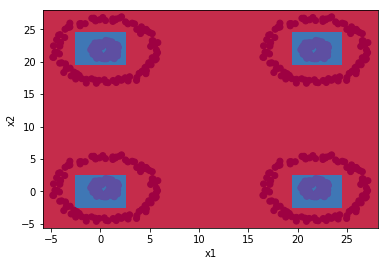

In [358]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [359]:
mynetwork.accuracy(X_train,Y_train)

1.0

In [360]:
mynetwork.train_all()

In [365]:
num_epochs = 100
batch_size = 64
learning_rate=0.001
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, optimizer = adam, beta = 0.9)

Loss:nan Acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 436.79it/s]


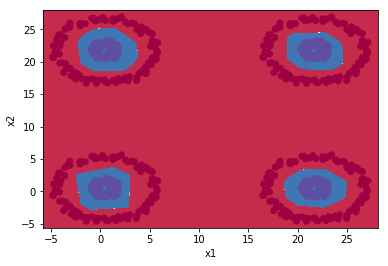

In [366]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [368]:
mynetwork.layers['L3']['weights']

array([[4.76810986, 4.57176221, 4.72919038, 4.55802581]])